# This notebook includes the visualization of the data set. All three data sets from yelp.com, amazon.com and imdb.com are combined here and most of the functions are breifly explained.

> Import the nessasarry libraries:

In [14]:
import pandas as pd
import matplotlib as plt
import string
import nltk
import re
import unicodedata

> Download 'wordnet' for stop-words vocabulary

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nalindakulathunga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> Following functions are for the removal of accents and pre-process text befor lamitizing.

In [16]:
def strip_accents(text):
    """
    Remove accents from input String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def text_to_id(text):
    """
    Convert input text to id.
    """
    text = strip_accents(text.lower())
    text = re.sub('[ ]+', '_', text)
    text = re.sub('[^0-9a-zA-Z_-]', '', text)
    return text

> Combinnig three data sets, 'amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt'

In [17]:
filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
with open('combined_reviews.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

In [18]:
Combined_DF = pd.read_csv("combined_reviews.txt", sep='\t', names = ["Review", "Label"])

In [19]:
Combined_DF.head(10)

,Review,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [20]:
print "Total number of sentences:"
print len(Combined_DF)

Total number of sentences:
2748


In [21]:
print "Suffle:"
Combined_DF = Combined_DF.sample(frac=1).reset_index(drop=True)
Combined_DF.head(10)

Suffle:


,Review,Label
0,"I love Lane, but I've never seen her in a movi...",0
1,Go To Place for Gyros.,1
2,Brilliance indeed.,1
3,"To my disbelief, each dish qualified as the wo...",0
4,I recently tried Caballero's and I have been b...,1
5,I posted more detailed comments under the grey...,1
6,The guy who said he's had better dialogue with...,0
7,This product is clearly not ready for prime ti...,0
8,"If there is a wind, it is completely useless.",0
9,I can assure you that you won't be disappointed.,1


In [23]:
print "Separating sentences and their labels:"
Combined_Df_RW = Combined_DF.drop('Label', axis=1)
Combined_Df_LB = Combined_DF["Label"]
print "\n________ Reviews _________"
print Combined_Df_RW.head()
print "\n________ Labels _________"
print Combined_Df_LB.head()

Separating sentences and their labels:

________ Reviews _________
                                              Review
0  I love Lane, but I've never seen her in a movi...
1                             Go To Place for Gyros.
2                               Brilliance indeed.  
3  To my disbelief, each dish qualified as the wo...
4  I recently tried Caballero's and I have been b...

________ Labels _________
0    0
1    1
2    1
3    0
4    1
Name: Label, dtype: int64


> Some text pre-processing are done in the following steps:

In [25]:
Combined_RW_List = Combined_Df_RW['Review'].tolist()

In [27]:
print "\n_________ Sentences list as it is: ___________\n"
print Combined_RW_List[:10]


_________ Sentences list as it is: ___________

["I love Lane, but I've never seen her in a movie this lousy.  ", 'Go To Place for Gyros.', 'Brilliance indeed.  ', 'To my disbelief, each dish qualified as the worst version of these foods I have ever tasted.', "I recently tried Caballero's and I have been back every week since!", "I posted more detailed comments under the grey or black phone, but i have the Fire Red and it's a great color!", "The guy who said he's had better dialogue with his potted plants has it right.  ", "This product is clearly not ready for prime time, I don't care how cool it looks, if you can't tell a call is coming in it's worthless.", 'If there is a wind, it is completely useless.', "I can assure you that you won't be disappointed."]


In [28]:
#Removing punctuations:
Combined_RW_List_nopunc = [''.join(c for c in s if c not in string.punctuation) for s in Combined_RW_List]

In [29]:
print "\n_________ Sentences after removing punctuations: ___________\n"
print Combined_RW_List_nopunc[:10]


_________ Sentences after removing punctuations: ___________

['I love Lane but Ive never seen her in a movie this lousy  ', 'Go To Place for Gyros', 'Brilliance indeed  ', 'To my disbelief each dish qualified as the worst version of these foods I have ever tasted', 'I recently tried Caballeros and I have been back every week since', 'I posted more detailed comments under the grey or black phone but i have the Fire Red and its a great color', 'The guy who said hes had better dialogue with his potted plants has it right  ', 'This product is clearly not ready for prime time I dont care how cool it looks if you cant tell a call is coming in its worthless', 'If there is a wind it is completely useless', 'I can assure you that you wont be disappointed']


In [31]:
#Checking whether empty sentences are present:
Combined_RW_List_nopunc_noempty = [s for s in Combined_RW_List_nopunc if s]

In [32]:
#Converting all charactors to lower case:
Combined_RW_List_nopunc_noempty_nocaps = [x.lower() for x in Combined_RW_List_nopunc_noempty]

In [33]:
print "\n_________ Sentences only with lower case letters: ___________\n"
print Combined_RW_List_nopunc_noempty_nocaps[:10]


_________ Sentences only with lower case letters: ___________

['i love lane but ive never seen her in a movie this lousy  ', 'go to place for gyros', 'brilliance indeed  ', 'to my disbelief each dish qualified as the worst version of these foods i have ever tasted', 'i recently tried caballeros and i have been back every week since', 'i posted more detailed comments under the grey or black phone but i have the fire red and its a great color', 'the guy who said hes had better dialogue with his potted plants has it right  ', 'this product is clearly not ready for prime time i dont care how cool it looks if you cant tell a call is coming in its worthless', 'if there is a wind it is completely useless', 'i can assure you that you wont be disappointed']


> Lemmatization:

In [34]:
from nltk.stem import WordNetLemmatizer

sent_list = []

count = 0
for item in range(2748):
    count += 1
    word_string = ""
    for word in Combined_RW_List_nopunc_noempty_nocaps[item][:].split(): 
        word_str = text_to_id(word)
        new_word = WordNetLemmatizer().lemmatize(word_str, 'v')
        word_string += str(new_word) + " "
    if word_string != "":
        sent_list.append(word_string) 

In [36]:
print "\n_________ Sentences after temmatizing: ___________\n"
print sent_list[:10]


_________ Sentences after temmatizing: ___________

['i love lane but ive never see her in a movie this lousy ', 'go to place for gyros ', 'brilliance indeed ', 'to my disbelief each dish qualify as the worst version of these foods i have ever taste ', 'i recently try caballeros and i have be back every week since ', 'i post more detail comment under the grey or black phone but i have the fire red and its a great color ', 'the guy who say hes have better dialogue with his pot plant have it right ', 'this product be clearly not ready for prime time i dont care how cool it look if you cant tell a call be come in its worthless ', 'if there be a wind it be completely useless ', 'i can assure you that you wont be disappoint ']


In [37]:
Cleaned_Comb_RW_df = pd.DataFrame(sent_list)
Cleaned_Comb_RW_df.columns = ['Reviews_Cleaned']

In [38]:
print Cleaned_Comb_RW_df.head(10)

                                     Reviews_Cleaned
0  i love lane but ive never see her in a movie t...
1                             go to place for gyros 
2                                 brilliance indeed 
3  to my disbelief each dish qualify as the worst...
4  i recently try caballeros and i have be back e...
5  i post more detail comment under the grey or b...
6  the guy who say hes have better dialogue with ...
7  this product be clearly not ready for prime ti...
8       if there be a wind it be completely useless 
9      i can assure you that you wont be disappoint 


> Occurance (frequency) of each word is presented bellow:

In [39]:
from collections import Counter

Long_sent = ""

for item in sent_list:
    Long_sent += item
    Long_sent += " "

sent_list_split = Long_sent.split()
Counter = Counter(sent_list_split)
most_occur = Counter.most_common(20)

In [40]:
print "\n_________ Most occured words with their frequencies before removing stop words: ___________\n"
print most_occur


_________ Most occured words with their frequencies before removing stop words: ___________

[('the', 1940), ('be', 1872), ('and', 1129), ('i', 887), ('a', 886), ('to', 666), ('it', 665), ('this', 639), ('of', 621), ('have', 420), ('in', 398), ('for', 336), ('not', 306), ('that', 303), ('with', 273), ('my', 251), ('very', 243), ('good', 226), ('on', 219), ('great', 207)]


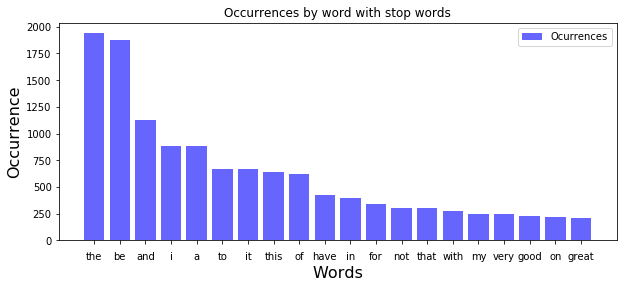

In [93]:
import numpy as np
import matplotlib.pyplot as pltpy

n_groups = len(most_occur)

freq = [x[1] for x in most_occur]
words = [x[0] for x in most_occur]

fig, ax = pltpy.subplots(figsize=(10, 4))

index = np.arange(n_groups)
bar_width = 0.8
opacity = 0.6

rects1 = pltpy.bar(index, freq, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')

pltpy.xlabel('Words', size=16)
pltpy.ylabel('Occurrence', size=16)
pltpy.title('Occurrences by word with stop words')
pltpy.xticks(index + bar_width, words)
pltpy.xticks(index, words)
pltpy.legend()

> Removing stop words:

In [94]:
#Downloading required data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nalindakulathunga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nalindakulathunga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(Long_sent) 
Long_sent_WO_stop = [w for w in word_tokens if not w in stop_words]
 
Long_sent_WO_stop = []

for w in word_tokens:
    if w not in stop_words:
        Long_sent_WO_stop.append(w)

In [96]:
from collections import Counter
Long_sent_new = ""

for item in Long_sent_WO_stop:
    Long_sent_new += item
    Long_sent_new += " "
    
sent_list_split_new = Long_sent_new.split()
Counter_2 = Counter(sent_list_split_new)
most_occur_new = Counter_2.most_common(20)

In [97]:
print most_occur_new

[('good', 226), ('great', 207), ('film', 184), ('movie', 177), ('phone', 173), ('one', 143), ('like', 142), ('work', 141), ('0', 138), ('time', 134), ('1', 128), ('place', 126), ('make', 125), ('go', 125), ('get', 124), ('food', 124), ('service', 107), ('really', 103), ('bad', 99), ('use', 91)]


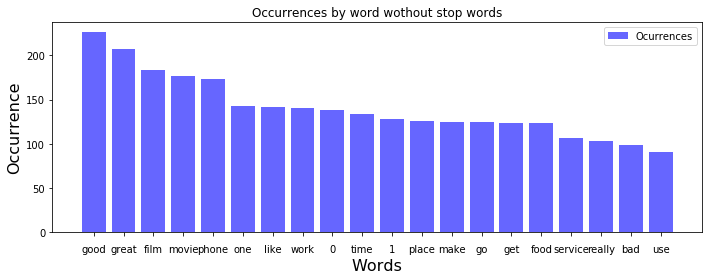

In [99]:
n_groups = len(most_occur_new)

freq = [x[1] for x in most_occur_new]
words = [x[0] for x in most_occur_new]

fig, ax = pltpy.subplots(figsize=(10, 4))

index = np.arange(n_groups)
bar_width = 0.8

opacity = 0.6

rects1 = pltpy.bar(index, freq, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


pltpy.xlabel('Words', size=16)
pltpy.ylabel('Occurrence', size=16)
pltpy.title('Occurrences by word wothout stop words')
pltpy.xticks(index, words)
pltpy.legend()

pltpy.tight_layout()
pltpy.show()